# Decision Tree Classifier

## Importações

In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(777)

## Base desbalanceada

### Importando e definindo base de dados

In [115]:
df_train = pd.read_csv('../../data/preprocessed/train-validation/drp_XOHE_scld.csv')
X = df_train.loc[:, df_train.columns != 'Target']
y = df_train['Target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=777)

selector = SelectKBest(score_func=f_classif, k='all')
X_train = selector.fit_transform(X_train, y_train)
X_val = selector.transform(X_val)

c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 16  17  46  70  72  73  76  98 100 102 104 119 138 140 172 178 181 185
 187 191 200 207] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### treinando classificador

In [116]:
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=777)

# Definir a métrica de avaliação
scorer = make_scorer(f1_score, pos_label='Dropout')

# Realizar a validação cruzada
cv_scores = cross_val_score(best_clf, X, y, cv=skf, scoring=scorer)

# Imprimir os resultados
print(f'Scores de F1 para cada fold: {cv_scores}')
print(f'Média do F1-score: {cv_scores.mean()}')
print(f'Desvio padrão do F1-score: {cv_scores.std()}')


Scores de F1 para cada fold: [0.75117371 0.78787879 0.76923077 0.72081218 0.7638191  0.784689
 0.78378378 0.66037736 0.68062827 0.77358491]
Média do F1-score: 0.7475977859649596
Desvio padrão do F1-score: 0.04305434367775862


### desempenho no conjunto de teste

In [117]:
df_test = pd.read_csv('../../data/preprocessed/test/drp_XOHE_scld.csv')
X_test = df_test.loc[:, df_train.columns != 'Target']
y_test = df_test['Target']

In [118]:
best_clf.fit(X, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

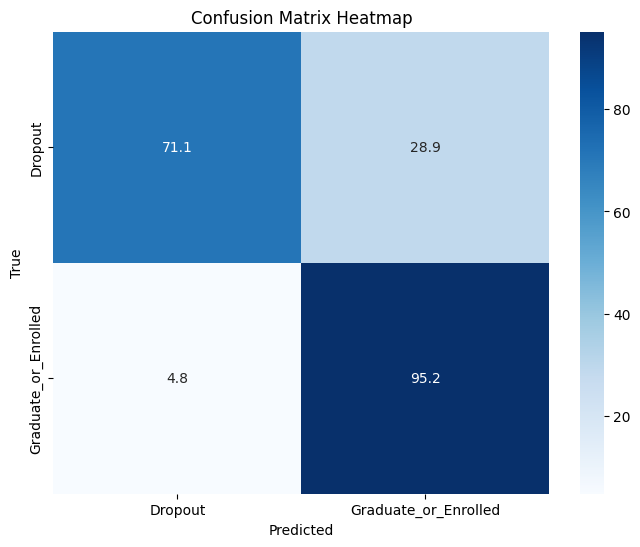

In [119]:
y_pred = best_clf.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=['Dropout', 'Graduate_or_Enrolled'])
labels = ['Dropout', 'Graduate_or_Enrolled']

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.xticks(np.arange(len(labels)) + 0.5, labels)
plt.yticks(np.arange(len(labels)) + 0.5, labels)
plt.show()

## Base balanceada

### importando base

In [120]:
df_train = pd.read_csv('../../data/preprocessed/train-validation/balanced/drp_XOHE_scld.csv')
X = df_train.loc[:, df_train.columns != 'Target']
y = df_train['Target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=777)

selector = SelectKBest(score_func=f_classif, k='all')
X_train = selector.fit_transform(X_train, y_train)
X_val = selector.transform(X_val)

c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  24  51  70  72  78  98 100 112 119 135 147 148 172 185 187 191] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### treinando classificador

In [121]:
clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=777)

# Definir a métrica de avaliação
scorer = make_scorer(f1_score, pos_label='Dropout')

# Realizar a validação cruzada
cv_scores = cross_val_score(best_clf, X, y, cv=skf, scoring=scorer)

# Imprimir os resultados
print(f'Scores de F1 para cada fold: {cv_scores}')
print(f'Média do F1-score: {cv_scores.mean()}')
print(f'Desvio padrão do F1-score: {cv_scores.std()}')

Scores de F1 para cada fold: [0.89786223 0.90521327 0.86341463 0.88674699 0.87192118 0.8952381
 0.88995215 0.89041096 0.85572139 0.87901235]
Média do F1-score: 0.8835493253251527
Desvio padrão do F1-score: 0.014982369411816677


### desempenho no conjunto de teste

In [122]:
best_clf.fit(X, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

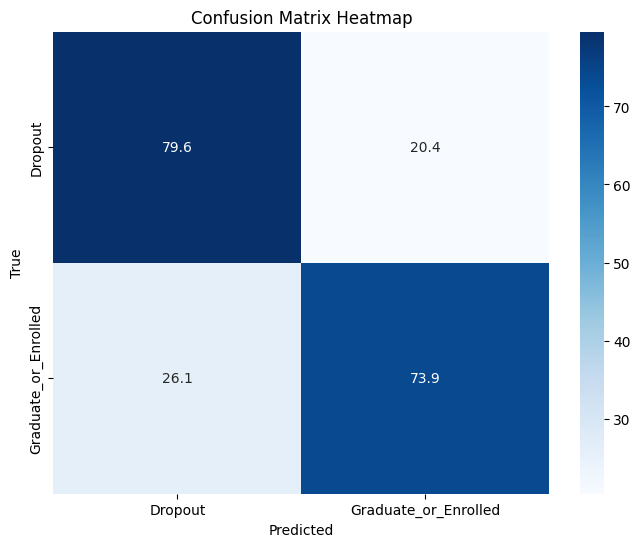

In [123]:
y_pred = best_clf.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=['Dropout', 'Graduate_or_Enrolled'])
labels = ['Dropout', 'Graduate_or_Enrolled']

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.xticks(np.arange(len(labels)) + 0.5, labels)
plt.yticks(np.arange(len(labels)) + 0.5, labels)
plt.show()